In [1]:
from scipy.sparse import coo_matrix
from scipy.sparse import save_npz, load_npz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle
import time

<br>Import original 'distance' matrix: *mx* as symmetirc matrix. 

Import page categories.

In [2]:
mx = load_npz('C:\\FOLDERS\\CEU\\Capstone Project\\Data\\sparse_matrix.npz')

In [3]:
mx_array = mx.toarray()

In [4]:
g = open("page_categories.pkl", "rb")
temp = pickle.load(g)
g.close()

In [5]:
categories = []

for key in temp:
    categories.append(temp[key])

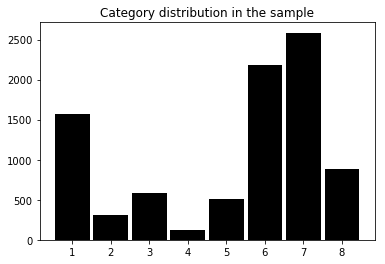

In [6]:
temp = np.array(categories)
bins = [1,2,3,4,5,6,7,8, 9]
plt.hist(temp, align = 'left', bins= bins, rwidth = 0.9, color = "k")
plt.title("Category distribution in the sample")
plt.show()

<br>
## Transform matrix elements
Replacing number of shared users with mx[i,j] = square(mx[i,j]) / (max(mx[i,:]) x max(mx[:,j])) creating a new kind of *dissimilarity matrix*.

In [4]:
mx_diss = np.zeros((8743, 8743)) # initializing the new dissimilarity matrix

In [8]:
def transform(matrix_in):
    matrix_out = np.zeros((8743,8743))
    for i in range(0,8742):
        for j in range(i+1, 8743):
            matrix_out[i,j] = 100 - 100 * matrix_in[i,j] * matrix_in[i,j] / (np.max(matrix_in[i,:]) * np.max(matrix_in[:,j]))
    return matrix_out


In [6]:
t1 = time.time()
for i in range(0,8742):
    for j in range(i+1, 8743):
        mx_diss[i,j] = 100 - 100 * mx_array[i,j] * mx_array[i,j] / (np.max(mx_array[i,:]) * np.max(mx_array[:,j]))
t2 = time.time()
print(t2 - t1)

C:\Users\peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


3194.749412059784


In [7]:
np.savetxt("C:\\FOLDERS\\CEU\\Capstone Project\\Data\\mx_square_dissimilarity.gz", mx_diss, delimiter=',')

<br>
## Scipy Hierarchy Clustering

Getting upper triangular values.

In [8]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, 8742):
    for j in range(i + 1, 8743):
        l.append(mx_diss[i,j])

<br>
### Running clusters:
- linkage method: **'ward'**.

In [9]:
Z = linkage(l, method="average")

- crosstabs

In [10]:
k=8
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')
page_labels = pd.DataFrame(scipy_hier_labels, columns=["labels"])
cat = pd.Series(categories)
page_labels['category'] = cat.values
ct = pd.crosstab(page_labels["labels"], page_labels["category"])
ct

ValueError: Linkage 'Z' contains negative distances.

- plotting clusters vs original labels

----------------------------------------------------

There are 164 negative elements in Z!

In [13]:
(Z < 0).sum()

164